Николаев Сергей, 317 группа

# Машинное обучение

# Практическое задание по EM-алгоритму

## Общая информация

Дата выдачи: 18.04.2017

Срок сдачи: 07.05.2017 23:59MSK

### О задании

Практическое задание посвящено EM-алгоритму и его использовании в задачах классификации. В рамках данного задания вы:
 * научитесь моделировать данные, сгенерированные из распределений сложной природы;
 * реализуете ЕМ-алгоритм для 2 различных моделей генерации данных;
 * изучите поведение оценок параметров распределений и скрытых переменных в процессе ЕМ-алгоритма;
 * научитесь использовать ЕМ-алгоритм как метод обучения с учителем.
 

# EM-алгоритм

## Бинарная последовательность

Пусть наблюдается выборка бинарных значений $\mathbb{Y} = (y_1,\ldots, y_l), \; y_i\in\{0,1\}$. Все элементы выборки генерируются независимо, но известно, что в некоторый момент $z$ меняется частота генерации единиц, т.е.:
$$\mathbb{P}(y_i = 1) = 
\begin{cases}
\theta_1, \, i < z,\\
\theta_2, \, i \ge z. 
\end{cases}$$

В рамках данной части задания вам необходимо будет реализовать ЕМ-алгоритм для данной модели, где $z$–скрытая переменная, а $\theta_1, \theta_2$ – параметры распределения.

1\. **(1 балл)** Выведите формулы Е- и М-шагов алгоритма для заданной модели. Напомним, что результатом Е-шага является распределение скрытых переменных $q(z)$, М-шага — оценки на параметры распределения.

Скрытая переменная z --- момент изменения частоты генерации единиц. Тогда получаем следующую формулу для полного правдоподобия:
$$P(Y, Z \left. \right| \theta) = P(Y \left. \right| Z, \theta) P(Z \left. \right| \theta) = \lbrace P(Z \left. \right| \theta) = P(Z) = \frac{1}{l} \rbrace = \frac{1}{l} \theta_{1}^{ \sum_{i=1}^{z-1}{y_i}} \left( 1 - \theta_{1} \right) ^{ z - 1 - \sum_{i=1}^{z-1}{y_i}} \theta_{2}^{ \sum_{i=z}^{l}{y_i}} \left( 1 - \theta_{2} \right) ^{ l - z + 1 - \sum_{i=z}^{l}{y_i}}$$

**E-шаг**.

\# Your code here

В E-шаге мы находим q(z) следующим образом:
$$q(Z) = P(Z \left. \right| Y, \theta) = \frac{P(Z, Y \left. \right| \theta)}{P(Y \left. \right| \theta)} = \frac{P(Z, Y \left. \right| \theta)}{\sum_{z}{P(Z, Y \left. \right| \theta)}} = \frac{\theta_{1}^{ \sum_{i=1}^{z-1}{y_i}} \left( 1 - \theta_{1} \right) ^{ z - 1 - \sum_{i=1}^{z-1}{y_i}} \theta_{2}^{ \sum_{i=z}^{l}{y_i}} \left( 1 - \theta_{2} \right) ^{ l - z + 1 - \sum_{i=z}^{l}{y_i}}}{\sum_{z=1}^{l}\theta_{1}^{ \sum_{i=1}^{z-1}{y_i}} \left( 1 - \theta_{1} \right) ^{ z - 1 - \sum_{i=1}^{z-1}{y_i}} \theta_{2}^{ \sum_{i=z}^{l}{y_i}} \left( 1 - \theta_{2} \right) ^{ l - z + 1 - \sum_{i=z}^{l}{y_i}}}$$

**М-шаг**.

\# Your code here

В М-шаге мы максимизируем по $\theta$ следующий функционал:
$$Q(q, \theta) = E_{q(Z)} \log{P(Y, Z \left. \right| \theta)} = \sum_{z=1}^{l}{q(z) \left( \left( \sum_{i=1}^{z-1}{y_i} \right) \log{\theta_1} + \left( z - 1 - \sum_{i=1}^{z-1}{y_i} \right) \log{(1 - \theta_1)} + \left( \sum_{i=z}^{l}{y_i} \right) \log{\theta_2} + \left( l - z + 1 - \sum_{i=z}^{l}{y_i} \right) \log{(1 - \theta_2)} \right)}$$
Вычислим производные по $\theta$, приравняем их нулю. Получим следующие оценки для $\theta$:
$$\theta_1 = \frac{\sum_{z=1}^{l}{q(z) \left( \sum_{i=1}^{z-1}{y_i} \right)}}{\sum_{z=1}^{l}{q(z) \left( z-1 \right)}}$$
$$\theta_2 = \frac{\sum_{z=1}^{l}{q(z) \left( \sum_{i=z}^{l}{y_i} \right)}}{\sum_{z=1}^{l}{q(z) \left( l-z+1 \right)}}$$

2\. **(2 балла)** Реализуйте ЕМ-алгоритм для заданной модели в виде функции, параметром которой является наблюдаемая выборка, а возвращаемым значением — векторы с оценками параметров распределений на каждой итерации алгоритма. В качестве критерия останова можете использовать ограничение количества итераций. Формат входных и выходных данных функции остаётся на ваше усмотрение.

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Your code here

def em(y, n_iter=10):
    l = y.shape[0]
    params = []
    eps = 10**(-12)
    
    # инициализация параметров
    theta = np.random.uniform(size=(2,))
    
    # инициализация вспомогательных величин
    cs_y1 = np.roll(np.cumsum(y), 1)
    cs_y1[0] = 0
    csm_y1 = np.arange(l) - cs_y1
    cs_y2 = np.cumsum(y[::-1])[::-1]
    csm_y2 = np.arange(l, 0, -1) - cs_y2    
    tmp = np.log(theta[0] + eps) * cs_y1 + np.log(1 - theta[0] + eps) * csm_y1\
        + np.log(theta[1] + eps) * cs_y2 + np.log(1 - theta[1] + eps) * csm_y2
    
    for i in range(n_iter):
        # E-шаг
        # для численной устойчивости будем проводить все действия над логарифмами
        q = tmp
        q -= np.max(q)
        q = np.exp(q)
        q /= np.sum(q)
        z = np.argmax(q) + 1
        # z = np.arange(1, l+1).dot(q)
        
        # M-шаг
        theta[0] = q.dot(cs_y1) / q.dot(np.arange(l))
        theta[1] = q.dot(cs_y2) / q.dot(np.arange(l, 0, -1))
        
        # вычислим целевую функцию
        tmp = np.log(theta[0] + eps) * cs_y1 + np.log(1 - theta[0] + eps) * csm_y1\
            + np.log(theta[1] + eps) * cs_y2 + np.log(1 - theta[1] + eps) * csm_y2
        val = q.dot(tmp - np.log(q + eps))
        
        params.append(list(theta) + [z, val])
 
    return np.array(params)

3\. **(0.5 балла)** Проведите эксперимент для $\theta_1 = 0.1$, $\theta_2 = 0.9, z=50, l=100.$ Для этого выполните следующие действия:
- сгенерируйте выборку для заданных истинных значений $\theta_1, \theta_2, z, l$;
- примените реализованную в п. 2 функцию;
- постройте графики зависимостей оценок $\theta_1, \theta_2, z$ от номера итерации ЕМ-алгоритма. 

In [72]:
# Your code here
l = 100
z = 50
theta1 = 0.1
theta2 = 0.9
y = np.zeros((l,))
y[:z-1] = np.random.binomial(1, theta1, (z-1,))
y[z-1:] = np.random.binomial(1, theta2, (l-z+1,))

params = em(y, 10)

In [73]:
np.mean(y[:z-1]), np.mean(y[z-1:])

(0.12244897959183673, 0.88235294117647056)

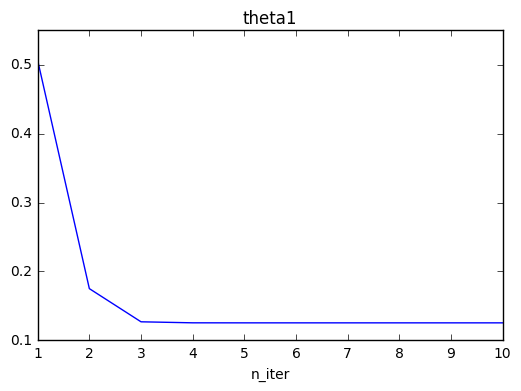

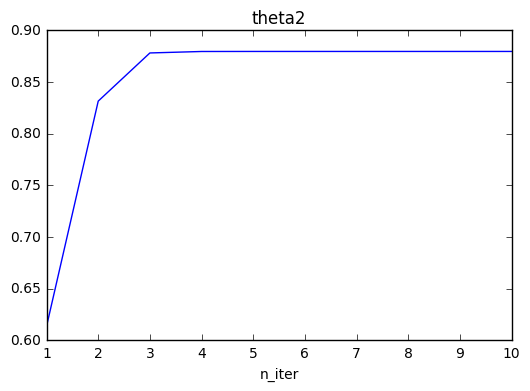

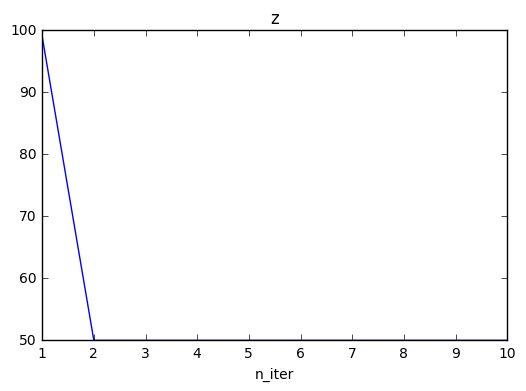

In [74]:
plt.plot(np.arange(1, 11), params[:, 0])
plt.xlabel('n_iter')
plt.title('theta1')
plt.show()

plt.plot(np.arange(1, 11), params[:, 1])
plt.xlabel('n_iter')
plt.title('theta2')
plt.show()

plt.plot(np.arange(1, 11), params[:, 2])
plt.xlabel('n_iter')
plt.title('z')
plt.show()

In [75]:
y

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.])

4\. **(0.5 балла)** Какой функционал оптимизирует ЕМ-алгоритм? Постройте график зависимости этого функционала от номера итерации ЕМ-алгоритма. Ведёт ли эта величина себя монотонно?

Изначальным функционалом, который хотелось бы максимизировать, является логарифм неполного правдоподобия $\log{P(Y \left. \right| \theta)}$. Но так как с таким функционалом трудно работать, то оптимизируется следующий функционал $E_{q(Z)}\log{\frac{P(Y, Z \left. \right| \theta)}{q(Z)}}$. Этот функционал является нижней оценкой для логарифма неполного правдоподобия, причем на Е-шаге достигается равенство.

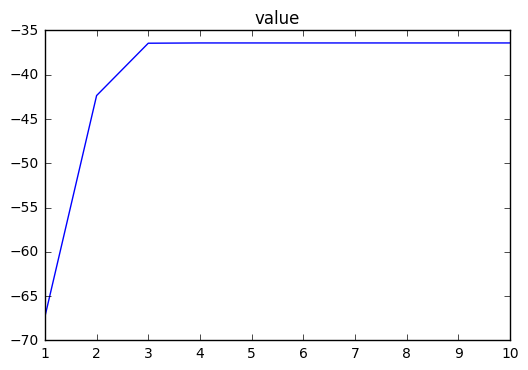

In [76]:
# Your code here
plt.plot(np.arange(1, 11), params[:, 3])
plt.title('value')
plt.show()

**Ответ:** Эта величина ведет себя монотонно, потому что ЕМ-алгоритм на каждой итерации максимизирует ее сначала по распределению q(Z), затем по параметру $\theta$

5\. **(0.5 балла)** Повторите эксперимент аналогично п.3 1000 раз для $\theta_1 = 0.49$, $\theta_2 = 0.51, z=500, l=550$. Оцените RMSE для между истинным значением и оценками, полученными в результате экспериментов, для $\theta_1, \theta_2, z$, а также постройте гистограмму полученных в результате экспериментов остатков для этих величин.

In [31]:
# Your code here
l = 550
z = 500
theta1 = 0.49
theta2 = 0.51
y = np.zeros((l,))
y[:z-1] = np.random.binomial(1, theta1, (z-1,))
y[z-1:] = np.random.binomial(1, theta2, (l-z+1,))
answer = np.array([theta1, theta2, z])
delta = np.zeros((1000, 3))

y_cum_mean1 = np.roll(np.cumsum(y) / np.arange(1, l + 1), 1)
y_cum_mean1[0] = 0
y_cum_mean2 = (np.cumsum(y[::-1]) / np.arange(1, l + 1))[::-1]

for i in range(1000):
    params = em(y, 10)
    delta[i] = params[-1, 0:3] - answer

Оценка RMSE

In [32]:
print('theta1: {}'.format(np.sqrt(np.mean(delta[:, 0] ** 2))))
print('theta2: {}'.format(np.sqrt(np.mean(delta[:, 1] ** 2))))
print('z: {}'.format(np.sqrt(np.mean(delta[:, 2] ** 2))))

theta1: 0.024492181226215513
theta2: 0.0042684210012167625
z: 272.0


Гистограммы разностей между истинными значениями и оценками.

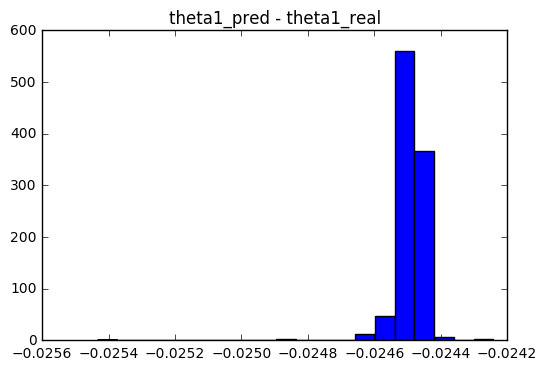

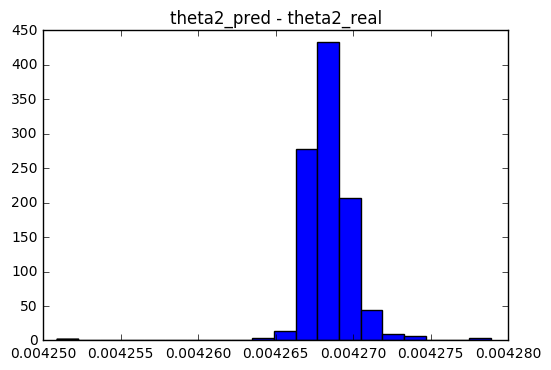

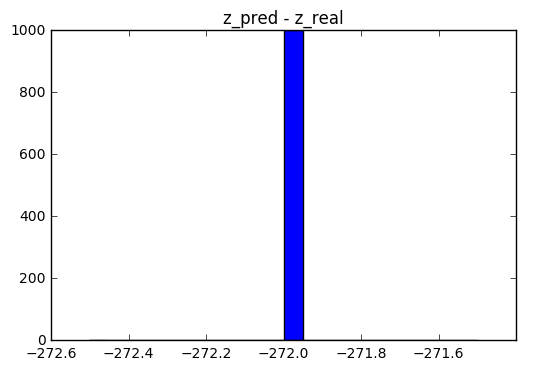

In [33]:
plt.hist(delta[:, 0], bins=20)
plt.title('theta1_pred - theta1_real')
plt.show()

plt.hist(delta[:, 1], bins=20)
plt.title('theta2_pred - theta2_real')
plt.show()

plt.hist(delta[:, 2], bins=20)
plt.title('z_pred - z_real')
plt.show()


Поведение кумулятивных средних для **y** при различных **z**

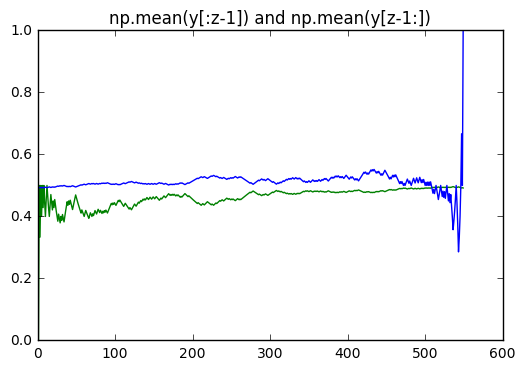

In [34]:
plt.plot(y_cum_mean1, c='g')
plt.plot(y_cum_mean2, c='b')
plt.title('np.mean(y[:z-1]) and np.mean(y[z-1:])')
plt.show()

По-моему, оценить разницу в 0.02 на 50 объектах довольно сложно. В данном случае ЕМ-алгоритм часто выбирает в качестве наиболее вероятного **z** числа, отличные от 500. Например, если в сгенерированных **y** в начале/конце есть много одинаковых значений (0, 0, 0, 1, ...), то алгоритм считает моментом перехода окончание/начало данной подпоследовательности. На примере предыдущего графика видно, что реализация выборки как правило сильно отличается от модели.

## Смесь нормальных распределений

Пусть данные описываются смесью многомерных нормальных распределений:
$$p(x_i|\Theta) = \sum_{k=1}^K \pi_k p(x_i|\theta_k) = \sum_{k=1}^K \pi_k \mathcal{N}(x_i|\mu_k, \Sigma_k).$$

В рамках данной части задания вам необходимо реализовать ЕМ-алгоритм для нахождения параметров указанного распределения (формулы для данной модели были выведены в материалах [семинара 15](https://github.com/esokolov/ml-course-hse/blob/master/2016-spring/seminars/sem15-EM.pdf)) и применить его для решения задачи классификации на датасете MNIST. Чтобы применение ЕМ-алгоритма к датасету MNIST было осмысленным, мы воспользуемся методом понижения размерности t-SNE.

7\. **(2 балла)** Реализуйте ЕМ-алгоритм для заданной модели в виде функции, параметром которой является наблюдаемая выборка, а возвращаемым значением — итоговые оценки параметров распределения и значения скрытых переменных. В качестве критерия останова можете использовать ограничение количества итераций. Формат входных и выходных данных функции остаётся на ваше усмотрение.

In [15]:
# Your code here

def em(X, K, n_iter=10):
    eps = 10**(-12)
    N, D = X.shape
    diag = np.diag(np.ones(D))
    # инициализация
    numbs = np.random.choice(N, (K,), replace=False)
    mean = X[numbs].copy()
    sigma = np.zeros((K, D, D))
    for i in range(K):
        sigma[i] = np.diag(np.ones(D))
    gamma = np.zeros((K, N))
    w = np.ones((K,)) / K
    
    for i in range(n_iter):
        # E-step
        for k in range(K):
            sign, logdet = np.linalg.slogdet(sigma[k])
            const = -0.5 * D * np.log(2 * np.pi) - 0.5 * logdet + np.log(w[k] + eps)
            X_sc = X - mean[k]
            gamma[k] = const - 0.5 * np.sum(X_sc.dot(np.linalg.inv(sigma[k])) * X_sc, axis=1)
        gamma -= np.max(gamma, axis=0)
        gamma = np.exp(gamma)
        gamma /= np.sum(gamma, axis=0)
    
        # M-step
        gamma_sum = np.sum(gamma, axis=1)
        w = gamma_sum / N
        mean = gamma.dot(X) / gamma_sum[:, np.newaxis]
        for k in range(K):
            X_sc = X - mean[k]
            sigma[k] = ((gamma[k] * X_sc.T).dot(X_sc) + 10**(-5) * diag) / (gamma_sum[k] + eps)
            
    return mean, sigma, w, np.argmax(gamma, axis=0)

def compute_z(X, mean, sigma, w):
    K = w.shape[0]
    N, D = X.shape
    gamma = np.zeros((K, N))
    for k in range(K):
        sign, logdet = np.linalg.slogdet(sigma[k])
        const = -0.5 * D * np.log(2 * np.pi) - 0.5 * logdet + np.log(w[k] + 10**(-12))
        X_sc = X - mean[k]
        gamma[k] = const - 0.5 * np.sum(X_sc.dot(np.linalg.inv(sigma[k])) * X_sc, axis=1)
    z = np.argmax(gamma, axis=0)

    return z

8\. **(1 балл)** Загрузите признаковые описания и значения целевой переменной для 2000 случайных объектов из обучающей выборки датасета [MNIST](http://yann.lecun.com/exdb/mnist/) и сохраните их в соответствующие переменные.

In [11]:
# Your code here

In [4]:
from sklearn import datasets
from sklearn.manifold import t_sne
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode

In [5]:
import matplotlib.patches as mpatches

In [6]:
mnist = datasets.fetch_mldata('MNIST original')

In [7]:
numbs = np.random.choice(60000, (2000,), replace=False)
X = mnist.data[numbs]
Y = mnist.target[numbs]

9\. **(0.5 балла)** Визуализируйте полученную выборку на плоскости при помощи t-SNE, используя различные цвета для объектов различных классов.

In [8]:
X_tsne = t_sne.TSNE().fit_transform(X)

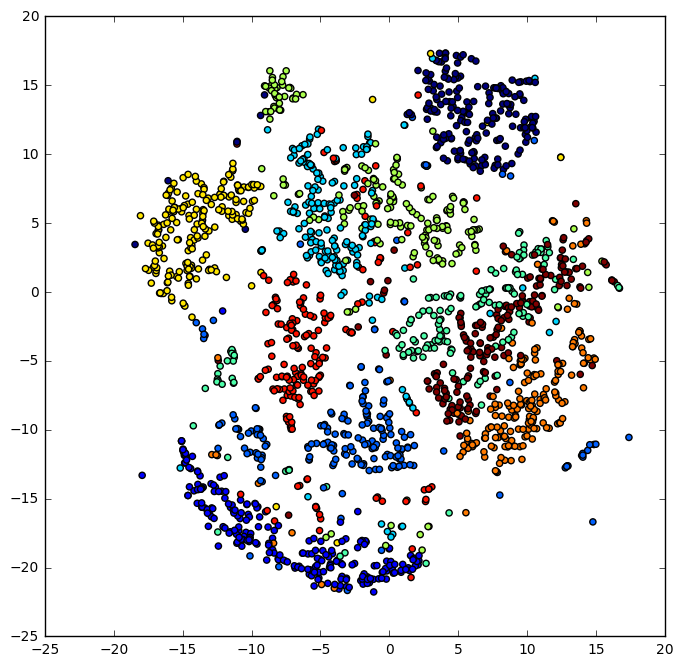

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y)
plt.show()

10\. **(0.5 балла)** Для выборки из п. 8 понизьте количество признаков до 3 при помощи t-SNE и примените функцию из п. 7 для разделения выборки на $K=10$ компонент.

In [11]:
# Your code here
X_tsne = t_sne.TSNE(n_components=3).fit_transform(X)

Полученное разделение выборки на компоненты можно использовать для построения классификатора, предсказывающего изображенную цифру. Для этого будем считать прогнозом для всех объектов $k$-ой компоненты самую частую истинную метку среди объектов этой компоненты:

$$a(x_i) = \arg \max_{k \in \{1, \dots, 10\}} \sum_{j=1}^l [z_j = z_i] [y_j = k],$$

где $z_i$ — вектор скрытых переменных для объекта выборки $x_i$.

11\. **(0.5 балла)** Выведите значение accuracy на используемой выборке для описанного выше способа построения прогнозов на объектах и истинной разметки выборки.

In [22]:
# Your code here
mean, sigma, w, z = em(X_tsne[:1400], 10, 30)

answer_tr = np.zeros(1400,)
answer_test = np.zeros(600,)

z_test = compute_z(X_tsne[1400:], mean, sigma, w)

for i in np.unique(z):
    m = mode(Y[np.where(z == i)[0]])[0][0]
    answer_tr[z == i] = m
    answer_test[z_test == i] = m

print('train_acc: {}'.format(np.mean(answer_tr == Y[:1400])))
print('test_acc: {}'.format(np.mean(answer_test == Y[1400:])))

train_acc: 0.5942857142857143
test_acc: 0.5883333333333334


12\. **(1 балл)** Постройте график зависимости значения accuracy на используемой выборке для описанного выше способа построения прогнозов на объектах и истинной разметки выборки от числа компонент $K$, фигурирующего в ЕМ-алгоритме.

Для корректности проверки качества обучение будет происходить на первых 1400 объектах, проверка - на оставшихся 600. Также для того, чтобы уменьшить влияние случайной инициализации параметров ЕМ-алгоритма, будем запускать алгоритм по 3 раза и в качестве результата брать среднее.

In [ ]:
# Your code here

In [23]:
train_acc = []
test_acc = []
answer_tr = np.zeros(1400,)
answer_test = np.zeros(600,)
grid = [10, 20, 40, 100, 200, 300, 400, 500, 600, 700]
for K in grid:
    trn_acc = 0
    tst_acc = 0
    for i in range(3):
        mean, sigma, w, z = em(X_tsne[:1400], K, 30)

        # для тестовых объектов определим кластер
        z_test = compute_z(X_tsne[1400:], mean, sigma, w)
    
        for i in np.unique(z):
            m = mode(Y[np.where(z == i)[0]])[0][0]
            answer_tr[z == i] = m
            answer_test[z_test == i] = m
        
        trn_acc += np.mean(answer_tr == Y[:1400])
        tst_acc += np.mean(answer_test == Y[1400:])
    train_acc.append(trn_acc / 3)
    test_acc.append(tst_acc / 3)


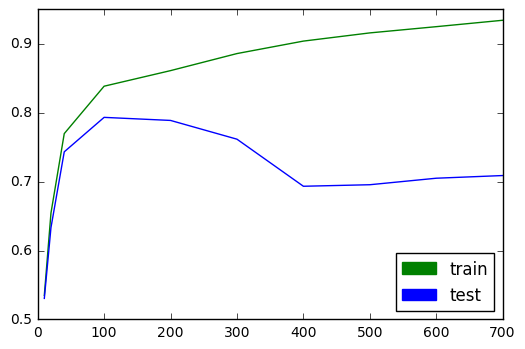

In [24]:
plt.plot(grid, train_acc, c='g')
plt.plot(grid, test_acc, c='b')
green_patch = mpatches.Patch(color='green', label='train')
blue_patch = mpatches.Patch(color='blue', label='test')
plt.legend(handles=[green_patch, blue_patch], loc=4)
plt.show()

Как видим, наблюдается переобучение при больших K

Вставьте одну из ваших любимых цитат преподавателей

- Лекции посещали?
- Да, посещали.
- Нет, не посещали. Понравились лекции? (Не давая ничего сказать) Очень понравились! Давайте зачетку.